# Schemat Hornera

Schemat Hornera jest metodą obliczania wartości wielomianu dla danej wartości argumentu. Ilość mnożeń jest zredukowana do minimum. Jest to również algorytm dzielenia wielomianu W(x) przez dwumian x - c. Schemat ten powiązany jest z nazwiskiem brytyjskiego matematyka Hornera żyjącego na przełomie XVIII i XIX wieku, który w 1819 roku podał sposób obliczania wartości wielomianu. 150 lat wcześniej Newton wykorzystał podobny sposób dla zmniejszenia liczby operacji fizycznych.

### Klasyczne podejście

Spójrzmy najpierw na tradycyjny sposób obliczania wartości wielomianu:

In [65]:
def oblicz_wartosc_wielomianu(wspolczynniki, x):
    stopien = len(wspolczynniki) - 1
    operacje = 0
    wartosc = 0
    
    #do wyniku dodajemy kolejno obliczone ze współczynników wartości
    for aktualny_stopien in range(stopien + 1):
        wartosc += wspolczynniki[aktualny_stopien] * (x ** aktualny_stopien)
        operacje += aktualny_stopien
        if aktualny_stopien != 0:
            #Po pierwszej iteracji współczynników, kolejne wymagają dodatkowej jednej operacji.
            operacje += 1

    return f"Wartość wielomianu dla argumentu {x} wynosi {wartosc}. Do obliczenia tej wartości, potrzebne było {operacje} operacji."

Powyższa funkcja oprócz wartości wielomianu liczy także ilość wykonanych operacji mnożenia. Możemy potem porównać, jak ta wartość wypada w porównaniu do schematu Hornera.

In [85]:
#W(x) = 5x^3 - 2x^2 + 3x + 11
wspolczynniki = [11, 3, -2, 5] #w odwrotnej kolejności (zaczynając od najniższego stopnia)
x = 10

print(oblicz_wartosc_wielomianu(wspolczynniki, x))

Wartość wielomianu dla argumentu 10 wynosi 4841. Do obliczenia tej wartości, potrzebne było 9 operacji.


### Schemat Hornera

Zobaczmy teraz, jak schemat Hornera radzi sobie z tym samym zadaniem:

In [57]:
def oblicz_wartosc_wielomianu_horner(wspolczynniki, x):
    stopien = len(wspolczynniki) - 1
    wartosc = wspolczynniki[stopien]
    operacje = 0
    
    while stopien > 0:
        stopien = stopien - 1
        wartosc = wartosc * x + wspolczynniki[stopien]
        
        #wykonywana jest jedna operacja mnożenia
        operacje += 1
        
    return f"Wartość wielomianu dla argumentu {x} wynosi {wartosc}. Potrzebne było {operacje} operacji."

W tym przypadku, również zaczynając od najwyższego stopnia po kolei mnożymy wartość wielominu przez x, a następnie dodajemy ten współczynnik.

In [63]:
#W(x) = 5x^3 - 2x^2 + 3x + 11
wspolczynniki = [11, 3, -2, 5]
x = 10
        
print(oblicz_wartosc_wielomianu_horner(wspolczynniki, x))

Wartość wielomianu dla argumentu 10 wynosi 4841. Potrzebne było 3 operacji.


Jak widać na powyższym przykładzie, schemat Hornera potrzebuje mniej operacji mnożenia, żeby obliczyć tą samą wartość wielomianu. Jest to szczególnie przydatne podczas optymalizowania aplikacji wykorzystujących wielomiany.

### Porównanie

Przy zastosowaniu schematu Hornera, liczba wymaganych operacji mnożenia jest taka sama, jak stopień wielomianu, podczas gdy klasyczne wyliczanie wartości wymaga ich znacznie więcej:

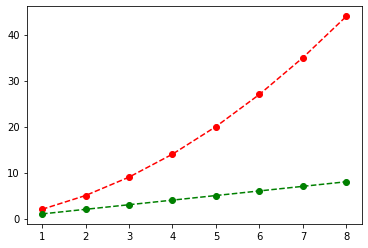

In [105]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6, 7, 8]
y1 = [2, 5, 9, 14, 20, 27, 35, 44]
y2 = [1, 2, 3, 4, 5, 6, 7, 8]

plt.plot(x, y1, color='red', marker='o', linestyle='dashed')
plt.plot(x, y2, color='green', marker='o', linestyle='dashed')

Na powyższym wykresie widać zależność pomiędzy stopniem wielomianu (oś x), a liczbą wymaganych do obliczenia jego wartości operacji mnożenia (oś y).

czerwony - Tradycyjna metoda  
zielony - schemat Hornera